## US visa decision prediction

loading required packages

In [25]:
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt

import seaborn as sns

In [26]:
warnings.filterwarnings('ignore')

loading data

In [27]:
df = pd.read_csv('us_perm_visas.csv')
df.tail()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN
374361,NaN,Phoenix,"Fragomen, Del Rey, Bernsen & Loewy, LLP",AZ,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"84,926.00","121,500.00",Year,NaN,NaN,NaN


In [28]:
df.shape

(374362, 154)

In [8]:
df.isna().sum()

add_these_pw_job_title_9089               332168
agent_city                                162908
agent_firm_name                           167365
agent_state                               166123
application_type                          239093
case_no                                   239093
case_number                               135269
case_received_date                        135271
case_status                                    0
class_of_admission                         22845
country_of_citizenship                     20633
country_of_citzenship                     353788
decision_date                                  0
employer_address_1                            42
employer_address_2                        149193
employer_city                                 14
employer_country                          135343
employer_decl_info_title                  135308
employer_name                                 12
employer_num_employees                    135349
employer_phone      

In [29]:
print('Number of Entries:', len(df))
print('Number of Columns:', len(df.columns))

Number of Entries: 374362
Number of Columns: 154


Drop mostly empty or null columns

In [30]:
df = df.loc[:, pd.notnull(df).sum()>len(df)*.35]
print(df.shape)

(374362, 94)


In [ ]:
#Treating missing value as 0
#df.fillna(0, inplace= True)

In [40]:
df.describe()

,employer_num_employees,employer_yr_estab,fw_info_yr_rel_edu_completed,job_info_alt_occ_num_months,job_info_experience_num_months
count,2.390130e+05,238958.000000,137198.000000,147200.000000,133188.000000
mean,2.309387e+04,1984.208267,2002.633603,36.483118,33.103560
std,5.453129e+05,38.470555,89.674423,23.391668,22.733393
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.300000e+01,1980.000000,2004.000000,24.000000,12.000000
50%,1.200000e+03,1996.000000,2007.000000,24.000000,24.000000
75%,1.613400e+04,2004.000000,2011.000000,60.000000,60.000000
max,2.635506e+08,2016.000000,2207.000000,240.000000,244.000000


### Exploratory Analysis

In [41]:
df.columns

Index(['agent_city', 'agent_firm_name', 'agent_state', 'application_type',
       'case_no', 'case_number', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_postal_code',
       'employer_state', 'employer_yr_estab', 'foreign_worker_info_city',
       'foreign_worker_info_education', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_state',
       'fw_info_alt_edu_experience', 'fw_info_birth_country',
       'fw_info_education_other', 'fw_info_postal_code',
       'fw_info_rel_occup_exp', 'fw_info_req_experience',
       'fw_info_training_comp', 'fw_info_yr_rel_edu_completed',
       'fw_ownership_interest', 'ji_fw_live_on_premises',
       'ji_live_in_domestic_service', 'ji_offered_to_sec_j_fw'

In [31]:
df['employer_city'].value_counts().head(10)

NEW YORK           16730
COLLEGE STATION    12118
SANTA CLARA        11113
SAN JOSE            9349
REDMOND             8804
MOUNTAIN VIEW       8259
HOUSTON             6446
SUNNYVALE           6285
SAN FRANCISCO       6254
PLANO               5836
Name: employer_city, dtype: int64

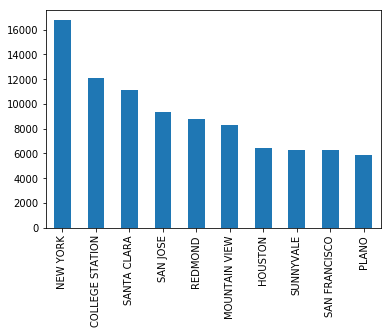

In [32]:
df['employer_city'].value_counts().head(10).plot(kind='bar')

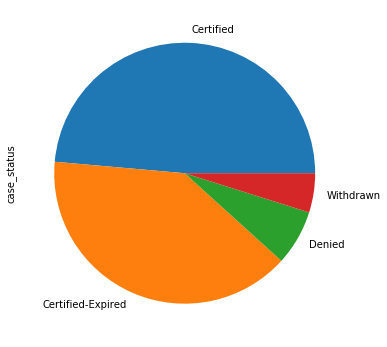

In [37]:
case_status = pd.Series(df['case_status'].value_counts())
case_status.plot.pie(figsize=(6, 6))

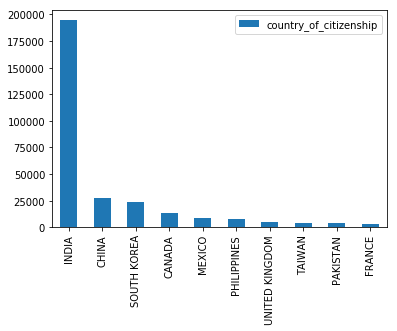

In [33]:

country_of_citizenship = pd.DataFrame(df['country_of_citizenship'].value_counts().head(10))
country_of_citizenship.plot(kind="bar")

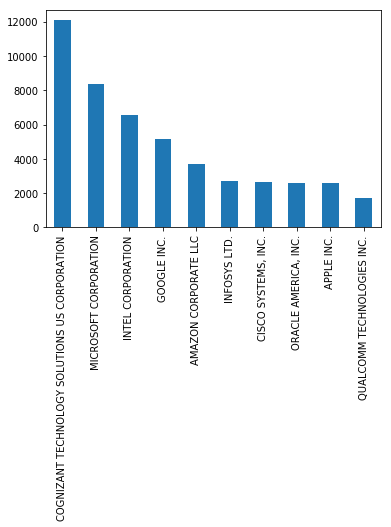

In [39]:
df['employer_name'].value_counts().head(10).plot(kind='bar')

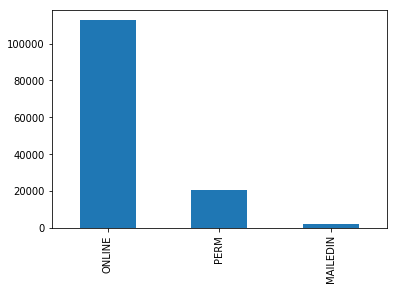

In [42]:
df['application_type'].value_counts().plot(kind='bar')

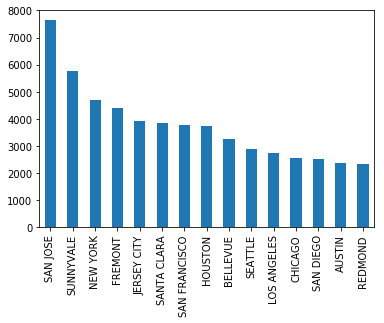

In [44]:
df['foreign_worker_info_city'].value_counts().head(15).plot(kind='bar')

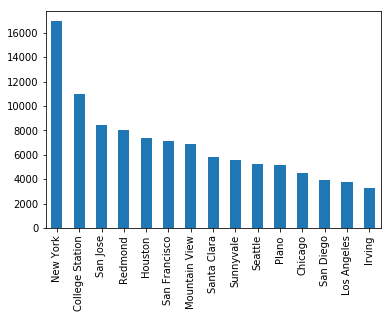

In [45]:
df['job_info_work_city'].value_counts().head(15).plot(kind='bar')

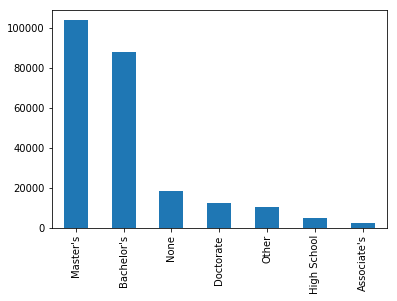

In [46]:
df['foreign_worker_info_education'].value_counts().head(15).plot(kind='bar')

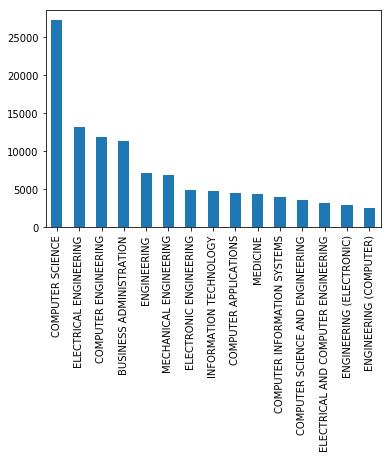

In [47]:
df['foreign_worker_info_major'].value_counts().head(15).plot(kind='bar')

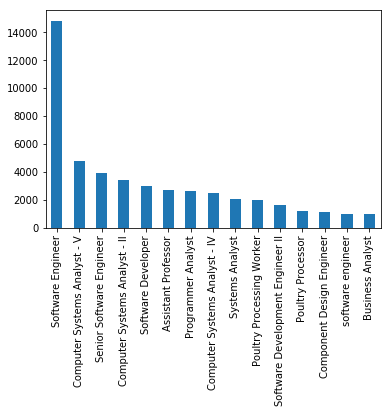

In [51]:
df['job_info_job_title'].value_counts().head(15).plot(kind='bar')